In [1]:
# for numerical computing
import numpy as np

# for dataframes data analysis and manupulation
import pandas as pd

# for easier data visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline 

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score


# to save the final model on disk
import joblib

In [2]:
df=pd.read_csv('indian_liver_patient.csv')

In [3]:
df.shape

(583, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

In [6]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

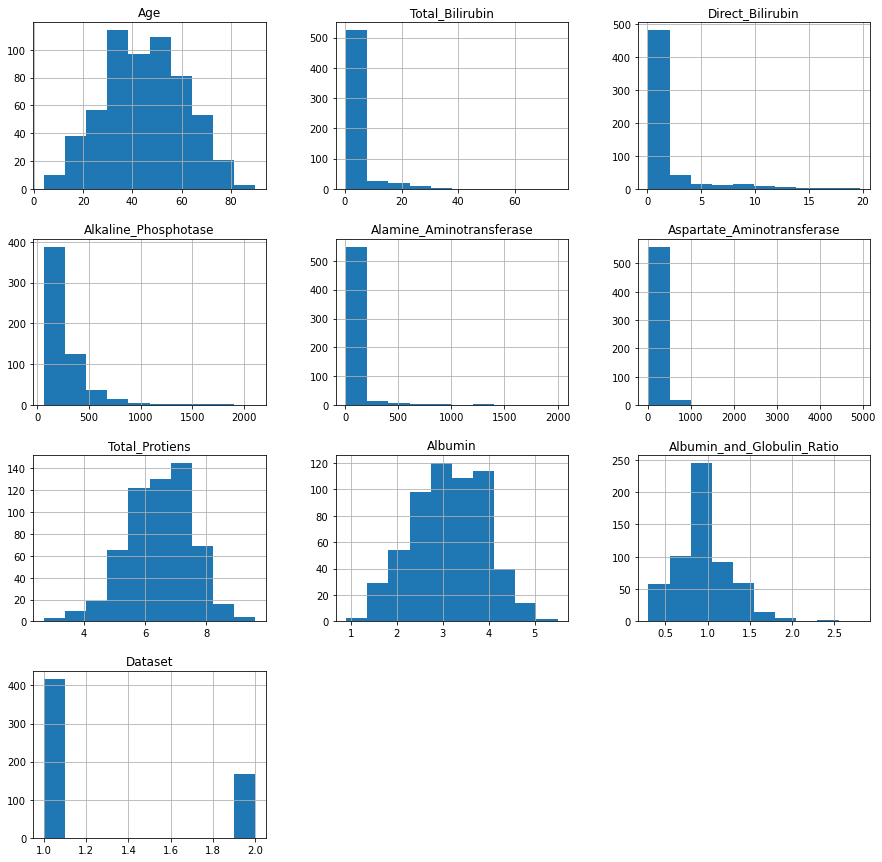

In [7]:
# Plot histogram grid
df.hist(figsize=(15,15), bins=10) ## Display the labels rotated by 45 degress


plt.show()

In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [9]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [10]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Number of patients that are male:  441
Number of patients that are female:  142


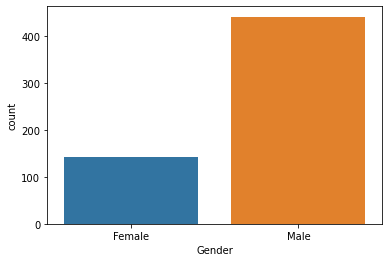

In [11]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [12]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

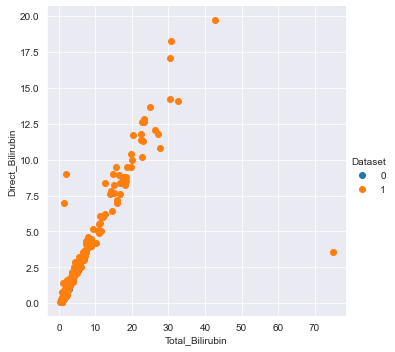

In [13]:
sns.set_style('darkgrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

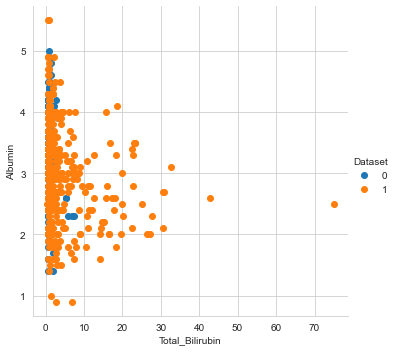

In [14]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

In [15]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


## Data Cleaning

In [16]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


There were 13 duplicates

## Removing Outliers

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

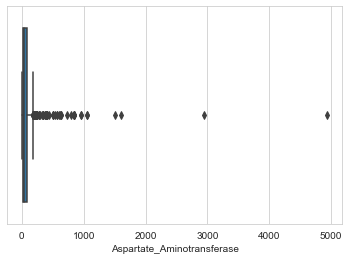

In [17]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [18]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [19]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

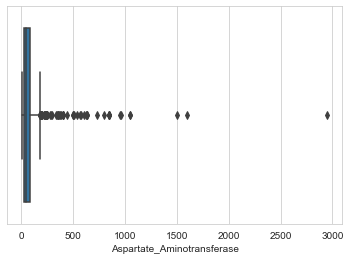

In [20]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [21]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [22]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [23]:
df.isnull().values.any()

True

In [24]:
df=df.dropna(how='any')  

In [25]:
df.shape

(564, 11)

In [26]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [27]:
# Create separate object for target variable dependent variable
y = df.Dataset

# Create separate object for input features independent variables
X = df.drop('Dataset', axis=1)

In [28]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=1234,
                                                    stratify=df.Dataset)



In [29]:
len(X_train), len(X_test)

(423, 141)

In [30]:
print(X_train)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
205   45       0              2.5               1.2                   163   
390   72       0              0.8               0.2                   148   
137   18       0              0.8               0.2                   282   
54    42       0              8.9               4.5                   272   
502   42       0              0.8               0.2                   127   
..   ...     ...              ...               ...                   ...   
410   18       0              1.4               0.6                   215   
377   20       1              0.6               0.2                   202   
582   38       0              1.0               0.3                   216   
425   58       0              0.4               0.1                   100   
552   45       0              0.6               0.1                   196   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [31]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(423, 10) (141, 10) (423,) (141,)


In [32]:
print(X_train.head())

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
205   45       0              2.5               1.2                   163   
390   72       0              0.8               0.2                   148   
137   18       0              0.8               0.2                   282   
54    42       0              8.9               4.5                   272   
502   42       0              0.8               0.2                   127   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
205                        28                          22             7.6   
390                        23                          35             6.0   
137                        72                         140             5.5   
54                         31                          61             5.8   
502                        29                          30             4.9   

     Albumin  Albumin_and_Globulin_Ratio  
205      4.0                   

# Data standardization


In [33]:
train_mean = X_train.mean()
print(train_mean)
train_std = X_train.std()

Age                            44.699764
Gender                          0.257683
Total_Bilirubin                 3.350591
Direct_Bilirubin                1.475650
Alkaline_Phosphotase          291.747045
Alamine_Aminotransferase       75.208038
Aspartate_Aminotransferase     94.827423
Total_Protiens                  6.524113
Albumin                         3.182742
Albumin_and_Globulin_Ratio      0.966478
dtype: float64


In [34]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [35]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02
mean,-1.093819e-16,7.558965e-17,-2.215197e-16,-1.060617e-15,-9.264982e-17,-6.824066e-17,5.262405e-17,-3.705993e-16,-2.373069e-15,1.649357e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.486234e+00,-5.884837e-01,-4.534968e-01,-4.981148e-01,-9.119371e-01,-3.952225e-01,-5.038798e-01,-3.530556e+00,-2.851401e+00,-2.011646e+00
25%,-7.147057e-01,-5.884837e-01,-3.920180e-01,-4.619054e-01,-4.594510e-01,-3.164302e-01,-4.147789e-01,-6.685271e-01,-7.279106e-01,-7.892243e-01
50%,1.834060e-02,-5.884837e-01,-3.612786e-01,-4.256960e-01,-3.258978e-01,-2.436988e-01,-3.137979e-01,7.006111e-02,2.155678e-02,1.011817e-01
75%,7.513869e-01,1.695265e+00,-1.153635e-01,-6.360187e-02,2.492842e-02,-9.520559e-02,-6.728555e-02,6.240023e-01,8.959354e-01,4.030143e-01
max,2.767264e+00,1.695265e+00,1.101229e+01,6.598929e+00,7.248760e+00,9.726560e+00,8.940812e+00,2.839767e+00,2.894515e+00,5.534168e+00


In [36]:
# We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [37]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.042169,-0.118777,-0.026089,0.021144,-0.007248,-0.013168,0.035444,-0.106074,-0.180427,-0.220987
std,0.978261,0.926366,0.852957,1.105051,0.887805,0.753676,1.098398,1.019860,0.970509,0.827055
min,-2.364060,-0.588484,-0.438127,-0.498115,-0.804297,-0.395222,-0.486060,-3.438233,-2.851401,-2.011646
25%,-0.714706,-0.588484,-0.392018,-0.461905,-0.469418,-0.322491,-0.420719,-0.760851,-0.852822,-0.804316
50%,0.018341,-0.588484,-0.376648,-0.425696,-0.341844,-0.261882,-0.331618,-0.022262,-0.228266,-0.200651
75%,0.812474,-0.588484,-0.146103,-0.136021,0.004995,-0.043688,-0.028675,0.531679,0.521202,0.101182
max,2.461828,1.695265,4.218890,6.091998,5.295295,5.302068,8.346806,2.193502,2.145048,2.515842


##  Model-1 Logistic Regression

In [38]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [39]:
model.best_estimator_

LogisticRegression(C=1)

In [40]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [41]:
## Predict Test set results
y_pred = model.predict(X_test)

In [42]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [43]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.51063073, 0.58547018, 0.99976955, 0.70390657, 0.59697451,
       0.64962351, 0.53621802, 0.94983653, 0.67409784, 0.98590322])

In [44]:
i=28  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 28, actual class = 1, precited class = 1, predicted probability = 0.9001508450119297


In [45]:
confusion_matrix(y_test, y_pred).T

array([[ 5,  7],
       [35, 94]], dtype=int64)

In [46]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [47]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.586297042644736


In [48]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.7289603960396039


#### Feature Importance

In [49]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=1)

In [50]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Aspartate_Aminotransferase
Direct_Bilirubin
Alamine_Aminotransferase
Total_Bilirubin
Total_Protiens
Albumin
Alkaline_Phosphotase
Age
Gender
Albumin_and_Globulin_Ratio


## Model-2 Random Forest

In [51]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [52]:
model.best_estimator_

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)

In [53]:
y_train_pred = model.predict(X_train)

In [54]:
y_pred = model.predict(X_test)

In [55]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [56]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.60243684, 0.46305861, 0.97287951, 0.83058106, 0.59368793,
       0.40006891, 0.62213951, 0.90194014, 0.62030347, 0.96869469])

In [57]:
confusion_matrix(y_test, y_pred).T

array([[ 7, 12],
       [33, 89]], dtype=int64)

In [58]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [59]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.8835847720712378

In [60]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.7366336633663365


#### Feature Importance

In [61]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [62]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkaline_Phosphotase
Aspartate_Aminotransferase
Total_Bilirubin
Alamine_Aminotransferase
Age
Direct_Bilirubin
Albumin_and_Globulin_Ratio
Total_Protiens
Albumin
Gender


## Model-3 KNN

In [63]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 7.


In [64]:
MSE.index(min(MSE))

3

In [65]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [66]:
y_pred = classifier.predict(X_test)


In [67]:
y_train_pred = classifier.predict(X_train)

In [68]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

62.4113475177305

In [69]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[ 7, 20],
       [33, 81]], dtype=int64)

In [70]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [71]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.85714286, 0.57142857, 1.        , 0.85714286, 0.71428571,
       0.57142857, 0.71428571, 1.        , 0.85714286, 0.85714286])

In [72]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [73]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.7172267305702303

In [74]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.6158415841584159


## Model-4 Descision Trees

In [75]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [76]:
model.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=4)

In [77]:
y_train_pred = model.predict(X_train)

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [80]:
y_pred_proba[:10]

array([0.48823529, 0.48823529, 0.96296296, 0.76041667, 0.48823529,
       0.48823529, 0.76041667, 0.76041667, 0.76041667, 0.96296296])

In [81]:
confusion_matrix(y_test, y_pred).T

array([[24, 35],
       [16, 66]], dtype=int64)

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [83]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.7186836228963565

In [84]:
print(auc(fpr, tpr))

0.6752475247524752


#### Feature Importance

In [85]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [86]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Age
Albumin_and_Globulin_Ratio
Aspartate_Aminotransferase
Direct_Bilirubin
Alamine_Aminotransferase
Gender
Total_Protiens
Albumin


## Model-5 SVM

In [87]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [88]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(probability=True)

In [89]:
svc_param_selection(X_train,y_train,5)

{'C': 1, 'gamma': 1}

In [90]:
###### Building the model again with the best hyperparameters
model = SVC(C=1, gamma=1,probability=True)
model.fit(X_train, y_train)

SVC(C=1, gamma=1, probability=True)

In [91]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [92]:
## Predict Test results
y_pred = model.predict(X_test)

In [93]:
confusion_matrix(y_test, y_pred).T

array([[ 5,  7],
       [35, 94]], dtype=int64)

In [94]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [95]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [96]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.7842301617558958

In [97]:
print(auc(fpr, tpr))

0.5524752475247525


##  Save the winning model to disk

In [98]:
win_model = RandomForestClassifier( n_estimators=500)
win_model.fit(X_train, y_train)
with open('LiverDisease.pkl', 'wb') as pickle_file:
      joblib.dump(win_model, 'LiverDisease.pkl') 

In [99]:
import pickle
win_model = RandomForestClassifier( n_estimators=500)
win_model.fit(X_train, y_train)
with open('LiverDisease.pkl', 'wb') as files:
      pickle.dump(win_model, files) 

In [100]:
with open('LiverDisease.pkl','rb') as f:
    lr=pickle.load(f)
print(X_train.head())

lr.predict(X_train)

          Age    Gender  Total_Bilirubin  Direct_Bilirubin  \
205  0.018341 -0.588484        -0.130733         -0.099811   
390  1.667695 -0.588484        -0.392018         -0.461905   
137 -1.631013 -0.588484        -0.392018         -0.461905   
54  -0.164921 -0.588484         0.852927          1.095099   
502 -0.164921 -0.588484        -0.392018         -0.461905   

     Alkaline_Phosphotase  Alamine_Aminotransferase  \
205             -0.513271                 -0.286125   
390             -0.573071                 -0.316430   
137             -0.038858                 -0.019444   
54              -0.078725                 -0.267943   
502             -0.656791                 -0.280064   

     Aspartate_Aminotransferase  Total_Protiens   Albumin  \
205                   -0.432599        0.993296  1.020847   
390                   -0.355378       -0.483880 -0.228266   
137                    0.268328       -0.945498 -0.852822   
54                    -0.200937       -0.668527 -1.4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [101]:
with open('LiverDisease.pkl','rb') as f:
    lr=pickle.load(f)
print(X_train.head(10))
lr.predict(X_train.head(-1))

          Age    Gender  Total_Bilirubin  Direct_Bilirubin  \
205  0.018341 -0.588484        -0.130733         -0.099811   
390  1.667695 -0.588484        -0.392018         -0.461905   
137 -1.631013 -0.588484        -0.392018         -0.461905   
54  -0.164921 -0.588484         0.852927          1.095099   
502 -0.164921 -0.588484        -0.392018         -0.461905   
369  0.812474  1.695265        -0.392018         -0.461905   
23  -0.287095 -0.588484        -0.222951         -0.172230   
477  0.629212 -0.588484        -0.422757         -0.461905   
51  -0.653618  1.695265        -0.422757         -0.498115   
404 -1.386665 -0.588484        -0.392018         -0.461905   

     Alkaline_Phosphotase  Alamine_Aminotransferase  \
205             -0.513271                 -0.286125   
390             -0.573071                 -0.316430   
137             -0.038858                 -0.019444   
54              -0.078725                 -0.267943   
502             -0.656791                 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from flask import Flask,render_template,request



app = Flask(__name__)


@app.route('/')
def index():
    return render_template('index.html', **locals())


@app.route('/',methods = ["GET","POST"])
def predict():
    if request.method == "POST":
        details=[]
        #x - train_mean) / train_std)
        Age = int(request.form.get("Age"))
        details.append(Age)
        Gender = int(request.form.get("Gender")) #for female enter 1 male 0
        details.append(Gender)
        Total_Bilirubin = float(request.form.get("Total_Bilirubin"))
        details.append(Total_Bilirubin)
        Direct_Bilirubin = float(request.form.get("Direct_Bilirubin"))
        details.append(Direct_Bilirubin)
        Alkaline_Phosphotase = float(request.form.get("Alkaline_Phosphotase"))
        details.append(Alkaline_Phosphotase)
        Alamine_Aminotransferase = float(request.form.get("Alamine_Aminotransferase"))
        details.append(Alamine_Aminotransferase)
        Aspartate_Aminotransferase = float(request.form.get("Aspartate_Aminotransferase"))
        details.append(Aspartate_Aminotransferase)
        Total_Proteins = float(request.form.get("Total_Proteins"))
        details.append(Total_Proteins)
        Albumin = float(request.form.get("Albumin"))
        details.append(Albumin)
        Albumin_and_Globulin_Ratio = float(request.form.get("Albumin_and_Globulin_Ratio"))
        details.append(Albumin_and_Globulin_Ratio)
        details=(details - train_mean) / train_std
        details=[details]
        result=(lr.predict(details)[0])
        
        if(result== 1):
            print("Infected")
            new="infected"
        else:
            print("Not Infected")
            new="Not infected"
        
        
        return render_template('index.html',prediction_text=new,Age=Age,Gender= Gender, Total_Bilirubin=Total_Bilirubin, Direct_Bilirubin=Direct_Bilirubin,Alkaline_Phosphotase=Alkaline_Phosphotase, Alamine_Aminotransferase=Alamine_Aminotransferase,Aspartate_Aminotransferase= Aspartate_Aminotransferase, Total_Proteins=Total_Proteins, Albumin=Albumin, Albumin_and_Globulin_Ratio=Albumin_and_Globulin_Ratio)

if __name__ == "__main__":
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
 * Running on http://localhost:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Apr/2022 17:14:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2022 17:14:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2022 17:14:31] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2022 17:14:31] "POST / HTTP/1.1" 200 -


Not Infected
Not Infected


In [ ]:
with open('LiverDisease.pkl','rb') as f:
    lr=pickle.load(f)
print(X_train.head(10))
lr.predict(X_train.head(-1))


In [ ]:

abc=[[-1.245338,1.668451,-0.415056,-0.465814,-0.412936,-0.388332,-0.486561,-0.923844 , -1.083815 ,-0.771248]]
print(lr.predict(abc)[0])


In [ ]:
from flask import Flask, flash, request, redirect, url_for, render_template
import urllib.request
import os
from werkzeug.utils import secure_filename
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
import pytesseract as tess
from PIL import Image

 
app = Flask(__name__)
UPLOAD_FOLDER = 'static/uploads'
app.secret_key = "secret key"
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

 
ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif'])
 
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS
     
 
@app.route('/')
def home():
    return render_template('first.html')
 
@app.route('/second', methods=['POST'])
def upload_image():
    if 'file' not in request.files:
        flash('No file part')
        return redirect(request.url)
    file = request.files['file']
    if file.filename == '':
        flash('No image selected for uploading')
        return redirect(request.url)
    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
        print('upload_image filename: ' + filename)
        fullpaths = ['C:\\Users\\user\\Desktop\\github\\github\\Liver-disease-prediction-master\\static\\uploads\\{}'.format(filename)]
        print(fullpaths)
        img = Image.open(fullpaths[0])
        text = tess.image_to_string(img)

        print(text)

        try:
            sub = "Bilirubin- Total"
            text="\n".join(s for s in li if sub.lower() in s.lower())
            Total_Bilirubin=float(text[text.rindex(" ")+1:])
            print(Total_Bilirubin)
        
        except:
            print("Something went wrong when writing to the file")
            Total_Bilirubin=0.0
            print(Total_Bilirubin)
    

        try:
            sub = "Bilirubin- Direct"
            text="\n".join(s for s in li if sub.lower() in s.lower())
            Direct_Bilirubin=float(text[text.rindex(" ")+1:])
            print(Direct_Bilirubin)
            
        except:
            print("Something went wrong when writing to the file")
            Direct_Bilirubin=0.0
            print(Direct_Bilirubin)
    

        try:
            sub = "Alkaline Phosphatase"
            text="\n".join(s for s in li if sub.lower() in s.lower())
            Alkaline_Phosphotase=float(text[text.rindex(" ")+1:])
            print(Alkaline_Phosphotase)
        except:
            print("Something went wrong when writing to the file")
            Alkaline_Phosphotase=0.0
            print(Alkaline_Phosphotase)

        try:
            sub = "Sgpt"
            text="\n".join(s for s in li if sub.lower() in s.lower())
            Alamine_Aminotransferase=float(text[text.rindex(" ")+1:])
            print(Alamine_Aminotransferase)
        except:
            print("Something went wrong when writing to the file")
            Alamine_Aminotransferase=0.0
            print(Alamine_Aminotransferase)

        try:
            sub = "Sgot"
            text="\n".join(s for s in li if sub.lower() in s.lower())
            Aspartate_Aminotransferase=float(text[text.rindex(" ")+1:])
            print(Aspartate_Aminotransferase)
        except:
            print("Something went wrong when writing to the file")
            Aspartate_Aminotransferase=0.0
            print(Aspartate_Aminotransferase)

        try:
            sub = "Total Protein"
            text="\n".join(s for s in li if sub.lower() in s.lower())
            Total_Proteins=float(text[text.rindex(" ")+1:])
            print(Total_Proteins)
        except:
            print("Something went wrong when writing to the file")
            Total_Proteins=0.0
            print(Total_Proteins)

        try:
            sub = "Albumin"
            text="\n".join(s for s in li if sub.lower() in s.lower())
            Albumin=float(text[text.rindex(" ")+1:])
            print(Albumin)
        except:
            print("Something went wrong when writing to the file")
            Albumin=0.0
            print(Albumin)

        try:
            sub = "Globulin"
            text="\n".join(s for s in li if sub.lower() in s.lower())
            Globulin=float(text[text.rindex(" ")+1:])
            print(Globulin)
            Albumin_and_Globulin_Ratio=Albumin/Globulin
            print(Albumin_and_Globulin_Ratio)
            
        except:
            print("Something went wrong when writing to the file")
            Globulin=0.0
            print(Globulin)
            Albumin_and_Globulin_Ratio=0.0
            print(Albumin_and_Globulin_Ratio)
        
        Age=0
        Gender=0
        return render_template('second.html',Age=Age,Gender= Gender, Total_Bilirubin=Total_Bilirubin, Direct_Bilirubin=Direct_Bilirubin,Alkaline_Phosphotase=Alkaline_Phosphotase, Alamine_Aminotransferase=Alamine_Aminotransferase,Aspartate_Aminotransferase= Aspartate_Aminotransferase, Total_Proteins=Total_Proteins, Albumin=Albumin, Albumin_and_Globulin_Ratio=Albumin_and_Globulin_Ratio)

@app.route('/third',methods = ["POST"])
def predict():
    
    details=[]
    #x - train_mean) / train_std)
    Age = int(request.form.get("Age"))
    details.append(Age)
    Gender = int(request.form.get("Gender")) #for female enter 1 male 0
    details.append(Gender)
    Total_Bilirubin = float(request.form.get("Total_Bilirubin"))
    details.append(Total_Bilirubin)
    Direct_Bilirubin = float(request.form.get("Direct_Bilirubin"))
    details.append(Direct_Bilirubin)
    Alkaline_Phosphotase = float(request.form.get("Alkaline_Phosphotase"))
    details.append(Alkaline_Phosphotase)
    Alamine_Aminotransferase = float(request.form.get("Alamine_Aminotransferase"))
    details.append(Alamine_Aminotransferase)
    Aspartate_Aminotransferase = float(request.form.get("Aspartate_Aminotransferase"))
    details.append(Aspartate_Aminotransferase)
    Total_Proteins = float(request.form.get("Total_Proteins"))
    details.append(Total_Proteins)
    Albumin = float(request.form.get("Albumin"))
    details.append(Albumin)
    Albumin_and_Globulin_Ratio = float(request.form.get("Albumin_and_Globulin_Ratio"))
    details.append(Albumin_and_Globulin_Ratio)
    details=(details - train_mean) / train_std
    details=[details]
    result=(lr.predict(details)[0])

    if(result== 1):
        print("Infected")
        new="infected"
    else:
        print("Not Infected")
        new="Not infected"

    print(new)
    
if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
